In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
from matplotlib import rcParams

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 8,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 0.5*510 # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width * ratio  # height in inches
fig_size = [fig_width, 1.5*fig_height]
rcParams.update({'figure.figsize': fig_size})

In [5]:
sns.set_context("paper")

In [3]:
def simulation_average(model_data, times, T=100):
    """
    Returns daily averages of simulation data.
    """
    
    interp_arr = []
    
    for i in range(len(times)):
        
        xvals = np.linspace(0, T, 400)

        yinterp = np.interp(xvals, times[i], model_data[i])
        
        interp_arr.append(yinterp)
        
    return xvals, np.mean(interp_arr,axis=0)

/tmp/ipykernel_2942032/1707389761.py:196: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


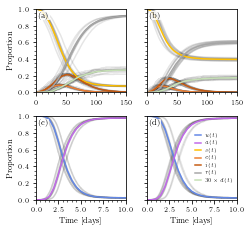

In [24]:
#fig, ax = plt.subplots(ncols=3)
mosaic = """
    AB
    CD
    """

N = 1e4

fig = plt.figure(constrained_layout=True)

ax = fig.subplot_mosaic(mosaic)
fig.patch.set_facecolor('white')

S_1_arr = []
E_1_arr = []
I_1_arr = []
R_1_arr = []
D_1_arr = []
A_1_arr = []
U_1_arr = []
t_1_arr = []

S_2_arr = []
E_2_arr = []
I_2_arr = []
R_2_arr = []
D_2_arr = []
A_2_arr = []
U_2_arr = []
t_2_arr = []

for i in range(10):
    time = np.load("../data/without_edge_removal/3.5/ts_%d.npy"%i)
    susceptibles = np.load("../data/without_edge_removal/3.5/S_t_%d.npy"%i)
    ax["A"].plot(time,susceptibles/N,'k',alpha=0.1)
    t_1_arr.append(time)
    S_1_arr.append(susceptibles)
    
    time = np.load("../data/without_edge_removal/2.5/ts_%d.npy"%i)
    susceptibles = np.load("../data/without_edge_removal/2.5/S_t_%d.npy"%i)
    ax["B"].plot(time,susceptibles/N,'k',alpha=0.1)
    t_2_arr.append(time)
    S_2_arr.append(susceptibles)

    time = np.load("../data/without_edge_removal/3.5/ts_%d.npy"%i)
    exposeds = np.load("../data/without_edge_removal/3.5/E_t_%d.npy"%i)
    ax["A"].plot(time,exposeds/N,'k',alpha=0.1)
    E_1_arr.append(exposeds)

    time = np.load("../data/without_edge_removal/2.5/ts_%d.npy"%i)
    exposeds = np.load("../data/without_edge_removal/2.5/E_t_%d.npy"%i)
    ax["B"].plot(time,exposeds/N,'k',alpha=0.1)
    E_2_arr.append(exposeds)

    time = np.load("../data/without_edge_removal/3.5/ts_%d.npy"%i)
    infecteds = np.load("../data/without_edge_removal/3.5/I_t_%d.npy"%i)
    ax["A"].plot(time,infecteds/N,'k',alpha=0.1)
    I_1_arr.append(infecteds)
    
    time = np.load("../data/without_edge_removal/2.5/ts_%d.npy"%i)
    infecteds = np.load("../data/without_edge_removal/2.5/I_t_%d.npy"%i)
    ax["B"].plot(time,infecteds/N,'k',alpha=0.1)
    I_2_arr.append(infecteds)

    time = np.load("../data/without_edge_removal/3.5/ts_%d.npy"%i)
    recovereds = np.load("../data/without_edge_removal/3.5/R_t_%d.npy"%i)
    ax["A"].plot(time,recovereds/N,'k',alpha=0.1)
    R_1_arr.append(recovereds)

    time = np.load("../data/without_edge_removal/2.5/ts_%d.npy"%i)
    recovereds = np.load("../data/without_edge_removal/2.5/R_t_%d.npy"%i)
    ax["B"].plot(time,recovereds/N,'k',alpha=0.1)
    R_2_arr.append(recovereds)

    time = np.load("../data/without_edge_removal/3.5/ts_%d.npy"%i)
    deaths = np.load("../data/without_edge_removal/3.5/D_t_%d.npy"%i)
    ax["A"].plot(time,3e1*deaths/N,'k',alpha=0.1)
    D_1_arr.append(deaths)

    time = np.load("../data/without_edge_removal/2.5/ts_%d.npy"%i)
    deaths = np.load("../data/without_edge_removal/2.5/D_t_%d.npy"%i)
    ax["B"].plot(time,3e1*deaths/N,'k',alpha=0.1)
    D_2_arr.append(deaths)
        
    time = np.load("../data/without_edge_removal/3.5/ts_%d.npy"%i)
    unawares = np.load("../data/without_edge_removal/3.5/U_t_%d.npy"%i)
    ax["C"].plot(time,unawares/N,'k',alpha=0.1)
    U_1_arr.append(unawares)
    
    time = np.load("../data/without_edge_removal/3.5/ts_%d.npy"%i)
    awares = np.load("../data/without_edge_removal/3.5/A_t_%d.npy"%i)
    ax["C"].plot(time,awares/N,'k',alpha=0.1)
    A_1_arr.append(awares)

    time = np.load("../data/without_edge_removal/2.5/ts_%d.npy"%i)
    unawares = np.load("../data/without_edge_removal/2.5/U_t_%d.npy"%i)
    ax["D"].plot(time,unawares/N,'k',alpha=0.1)
    U_2_arr.append(unawares)

    time = np.load("../data/without_edge_removal/2.5/ts_%d.npy"%i)
    awares = np.load("../data/without_edge_removal/2.5/A_t_%d.npy"%i)
    ax["D"].plot(time,awares/N,'k',alpha=0.1)
    A_2_arr.append(awares)

inter_t, inter_S_1 = simulation_average(S_1_arr, t_1_arr, T=200)
ax["A"].plot(inter_t,inter_S_1/N,color="#ffc000",linewidth=1.5,label=r"$S(t)$")   

inter_t, inter_E_1 = simulation_average(E_1_arr, t_1_arr, T=200)
ax["A"].plot(inter_t,inter_E_1/N,color="#ed7d31",linewidth=1.5,label=r"$E(t)$")  

inter_t, inter_I_1 = simulation_average(I_1_arr, t_1_arr, T=200)
ax["A"].plot(inter_t,inter_I_1/N,color="#c55a11",linewidth=1.5,label=r"$I(t)$")  

inter_t, inter_R_1 = simulation_average(R_1_arr, t_1_arr, T=200)
ax["A"].plot(inter_t,inter_R_1/N,color="#a6a6a6",linewidth=1.5,label=r"$R(t)$")       

inter_t, inter_D_1 = simulation_average(D_1_arr, t_1_arr, T=200)
ax["A"].plot(inter_t,3e1*inter_D_1/N,color="#c5e0b4",linewidth=1.5,label=r"$30 \times D(t)$")   

inter_t, inter_S_2 = simulation_average(S_2_arr, t_2_arr, T=200)
ax["B"].plot(inter_t,inter_S_2/N,color="#ffc000",linewidth=1.5,label=r"$S(t)$")  

inter_t, inter_E_2 = simulation_average(E_2_arr, t_2_arr, T=200)
ax["B"].plot(inter_t,inter_E_2/N,color="#ed7d31",linewidth=1.5,label=r"$E(t)$")   

inter_t, inter_I_2 = simulation_average(I_2_arr, t_2_arr, T=200)
ax["B"].plot(inter_t,inter_I_2/N,color="#c55a11",linewidth=1.5,label=r"$I(t)$")  

inter_t, inter_R_2 = simulation_average(R_2_arr, t_2_arr, T=200)
ax["B"].plot(inter_t,inter_R_2/N,color="#a6a6a6",linewidth=1.5,label=r"$R(t)$")    

inter_t, inter_D_2 = simulation_average(D_2_arr, t_2_arr, T=200)
ax["B"].plot(inter_t,3e1*inter_D_2/N,color="#c5e0b4",linewidth=1.5,label=r"$30\times D(t)$") 

inter_t, inter_U_1 = simulation_average(U_1_arr, t_1_arr, T=200)
ax["C"].plot(inter_t,inter_U_1/N,color="#6287e6",linewidth=1.5,label=r"$u(t)$")   

inter_t, inter_A_1 = simulation_average(A_1_arr, t_1_arr, T=200)
ax["C"].plot(inter_t,inter_A_1/N,color="#c168ea",linewidth=1.5,label=r"$a(t)$")   

inter_t, inter_U_2 = simulation_average(U_2_arr, t_2_arr, T=200)
ax["D"].plot(inter_t,inter_U_2/N,color="#6287e6",linewidth=1.5,label=r"$u(t)$")   

inter_t, inter_A_2 = simulation_average(A_2_arr, t_2_arr, T=200)
ax["D"].plot(inter_t,inter_A_2/N,color="#c168ea",linewidth=1.5,label=r"$a(t)$")  

ax["D"].plot(1e3,1e3,color="#ffc000",linewidth=1.5,label=r"$s(t)$")   
ax["D"].plot(1e3,1e3,color="#ed7d31",linewidth=1.5,label=r"$e(t)$")  
ax["D"].plot(1e3,1e3,color="#c55a11",linewidth=1.5,label=r"$i(t)$")  
ax["D"].plot(1e3,1e3,color="#a6a6a6",linewidth=1.5,label=r"$r(t)$")       
ax["D"].plot(1e3,1e3,color="#c5e0b4",linewidth=1.5,label=r"$30 \times d(t)$")   

text = ax["A"].text(0.02*150,0.9*1,r"(a)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["B"].text(0.02*150,0.9*1,r"(b)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["C"].text(0.02*10,0.9*1,r"(c)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["D"].text(0.02*10,0.9*1,r"(d)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

ax["A"].set_xlim(0,150)
ax["B"].set_xlim(0,150)
ax["C"].set_xlim(0,10)
ax["D"].set_xlim(0,10)

#ax["A"].legend(loc=6,frameon=False,ncol=1,handlelength=1,fontsize=7)
#ax["B"].legend(loc=1,frameon=True,ncol=2,handlelength=1,fontsize=5)
#ax["C"].legend(loc=7,frameon=False,ncol=1,handlelength=1,fontsize=7)
ax["D"].legend(loc=7,frameon=False,ncol=1,handlelength=1.25,fontsize=5)

ax["A"].xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax["B"].xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax["C"].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax["D"].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))

ax["A"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["B"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["C"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["D"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax["A"].set_ylim(0,1)
ax["B"].set_ylim(0,1)
ax["C"].set_ylim(0,1)
ax["D"].set_ylim(0,1)

ax["B"].set_yticklabels([])
ax["D"].set_yticklabels([])

ax["A"].set_ylabel("Proportion")
ax["C"].set_ylabel("Proportion")

ax["C"].set_xlabel("Time [days]")
ax["D"].set_xlabel("Time [days]")

plt.tight_layout()

plt.savefig("baseline.png",dpi=480)
plt.show()

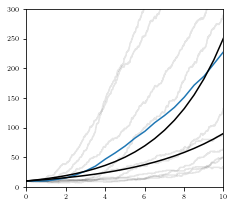

In [16]:
plt.figure()
for i in range(10):
    time = np.load("../data/without_edge_removal/2.5/ts_%d.npy"%i)
    infecteds = np.load("../data/without_edge_removal/2.5/I_t_%d.npy"%i)
    plt.plot(time,infecteds,'k',alpha=0.1)
    
plt.plot(inter_t,inter_I_2)
plt.plot(inter_t,10*3**(inter_t/5),color="k")
plt.plot(inter_t,10*5**(inter_t/5),color="k")
plt.xlim(0,10)
plt.ylim(0,300)
plt.show()

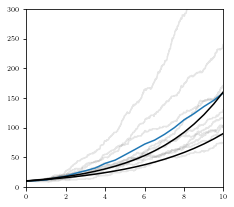

In [19]:
plt.figure()

for i in range(10):
    time = np.load("../data/without_edge_removal/3.5/ts_%d.npy"%i)
    infecteds = np.load("../data/without_edge_removal/3.5/I_t_%d.npy"%i)
    plt.plot(time,infecteds,'k',alpha=0.1)
plt.plot(inter_t,inter_I_1)
plt.plot(inter_t,10*3**(inter_t/5),color="k")
plt.plot(inter_t,10*4**(inter_t/5),color="k")
plt.xlim(0,10)
plt.ylim(0,300)
plt.show()

In [20]:
np.array(inter_U_1)+np.array(inter_A_1)

array([10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
       10049., 10049., 10049., 10049., 10049., 10049., 10049., 10049.,
      

In [21]:
np.array(inter_U_2)+np.array(inter_A_2)

array([10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
       10025., 10025., 10025., 10025., 10025., 10025., 10025., 10025.,
      